In [2]:
import cv2
import numpy as np
import pandas as pd
from scipy.io import loadmat

In [15]:
datafile = "SimulatorData/video1.csv"
tailfile = "SimulatorData/video1.mat"
videofile = "SimulatorData/video1.mp4"

num_sperm = 25
image_shape = (500,500,3)
head_size = 4

heads = pd.read_csv(datafile, index_col=False).values
tails = loadmat(tailfile)["Tail_history"]

#Reshape tails to separate each sperm
tails = tails.reshape(25, tails.shape[0]//num_sperm, tails.shape[1],tails.shape[2])

print(heads)
print(tails)
print(tails.shape)

c:\Users\hartda23\.conda\envs\pytorch23\Lib\site-packages\scipy\io\matlab\_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


[[  2.     332.97   123.71   ...   1.       0.       0.    ]
 [  3.      94.401  147.98   ...   1.       0.       0.    ]
 [  4.      64.008  308.55   ...   1.       0.       0.    ]
 ...
 [ 23.     289.93     6.3754 ... 900.       1.       0.    ]
 [ 24.     151.76   308.48   ... 900.       1.       0.    ]
 [ 25.     217.59   204.93   ... 900.       1.       0.    ]]
[[[[350.66370844 347.52252782 344.35370788 ...  21.24228243
     18.64911999  17.41686705]
   [297.7112593  297.33962035 296.85986783 ... 221.86706916
    222.07101973 222.91035601]]

  [[350.91232301 347.82243046 344.64316625 ...  21.37726761
     18.76820276  17.47613166]
   [297.67032084 297.34730121 296.90288439 ... 221.82911654
    221.99443853 222.76413695]]

  [[351.15310511 348.11897357 344.93509658 ...  21.5111288
     18.88967577  17.54042553]
   [297.62647445 297.35207639 296.9435572  ... 221.79125528
    221.92246153 222.62525371]]

  ...

  [[388.1097168  387.2781436  386.4640425  ...   2.50881686
      2.59

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


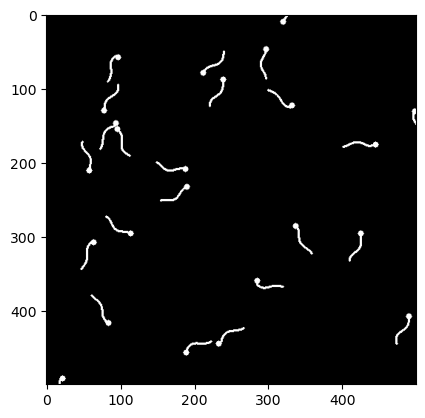

In [25]:
num_sperm, num_points, _, num_frames = tails.shape
import matplotlib.pyplot as plt

# Cell index, x, y, angle, frame, type, flag

images = []
segmentations = []

for frame in range(0,num_frames):
    
    image = np.zeros(image_shape)
    segs = []
    
    for sperm in range(0,num_sperm):
        tail_points = tails[sperm,:,:,frame]
        # Match at the 5th column
        head_vals = heads[heads[:,4] == frame+1]
        head_vals = head_vals[head_vals[:,0] == sperm+1]

        if head_vals.shape[0] == 0:
            continue
        elif head_vals.shape[0] > 1:
            print("Multiple heads")

        # Grab the x,y,angle values
        x,y,angle = head_vals[0,1:4]
    
        buffer = np.zeros(image_shape)

        # Draw the head
        #cv2.ellipse(image, (int(x), int(y)), (int(1.5*np.sqrt(head_size)), int(np.sqrt(head_size))), angle, 0, 360, (255, 255, 255), -1)
        cv2.circle(buffer, (int(x), int(y)), head_size, (255, 255, 255), -1)

        # Draw the tail
        for i in range(0,num_points):
            x,y = tail_points[i]
            cv2.circle(buffer, (int(x), int(y)), 1, (255, 255, 255), -1)

        # Save segmentations as list of indices
        locs = np.where(buffer[:,:,0] == 255)
        seg = np.array((locs[0], locs[1])).T
        segs.append(seg)

        # Add to image
        image += buffer
        
    segmentations.append(segs)
    images.append(image)
    break

plt.imshow(images[0])
plt.show()

(167, 2)
(174, 2)
(172, 2)
(79, 2)
(178, 2)
(66, 2)
(168, 2)
(183, 2)
(176, 2)
(167, 2)
(167, 2)
(172, 2)
(171, 2)
(170, 2)
(168, 2)
(76, 2)
(171, 2)
(170, 2)
(175, 2)
(172, 2)
(168, 2)
(170, 2)
(171, 2)
(168, 2)


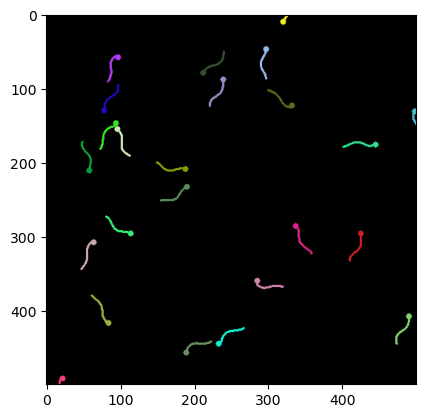

In [26]:
buffer = np.zeros((image_shape[0], image_shape[1], 3), dtype=np.uint8)
for seg in segmentations[0]:
    print(seg.shape)
    buffer[seg[:,0], seg[:,1], :] = np.random.randint(0, 255, 3)

plt.imshow(buffer)
plt.show()    